## Segundo Examen Parcial  de Estadística Aplicada
Enero-Junio 2023

**Nombre:** Andrik Daniel Vazquez Regalado

**Matricula:** 1905622

**Instrucciones:** En cada punto importa las librerias que consideres necesarias

In [1]:
# Importa las librerias de numpy, python y matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#instalar lifelines
!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.7/349.7 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 KB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=04141046352102622642ff50c4e54322464725e939d956a3c5c48b29752ddb8c
  Stored in directory: /root/.cache/pip/wheels/a8/03/64/8557323821d25118c3a2dc1646996f7a962a8970d4b7d22473
Successfully built autograd-gamma


In [3]:
# importa la base de datos llamada credit_risk.csv
# https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv
cred_riesgo = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')
cred_riesgo.head()

,checking_account_status,duration,credit_history,purpose,amount,savings_account_status,employment_years,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,number_of_credits,job,people_liable,telephone,foreign_worker,full_repaid
0,below_0,6,critical_account,radio_TV,1169,unknown,above_7,4,M_single,None,...,real_estate,67,None,own,2,official,1,1,1,1
1,0_to_200,48,existing_credit_paid,radio_TV,5951,below_100,between_1_4,2,F_not_single,None,...,real_estate,22,None,own,1,official,1,0,1,0
2,no_account,12,critical_account,education,2096,below_100,between_4_7,2,M_single,None,...,real_estate,49,None,own,1,unskilled,2,0,1,1
3,below_0,42,existing_credit_paid,furniture_equipment,7882,below_100,between_4_7,2,M_single,guarantor,...,life_insurance,45,None,free,1,official,2,0,1,1
4,below_0,24,delay_in_paying,car_new,4870,below_100,between_1_4,3,M_single,None,...,no_property,53,None,free,2,official,2,0,1,0


La base de datos es la información proporcionada por un banco donde nos muestra el tiempo que transcurre desde que un cliente pide un préstamo hasta que lo paga completamente (evento)

a continuación se muestran la descripción de la base de datos



<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-fymr">   <br>Característica   </th>
    <th class="tg-fymr">   <br>Variable   </th>
    <th class="tg-fymr">   <br>Tipo   </th>
    <th class="tg-fymr">   <br>Descripción   </th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">   <br>Time   </td>
    <td class="tg-0pky">   <br>duration   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Duration in month   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Event   </td>
    <td class="tg-0pky">   <br>full_repaid   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Specifies if the loan was fully   repaid   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Socio-Demographic   </td>
    <td class="tg-0pky">   <br>age   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Age of the borrower (in years)   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Socio-Demographic   </td>
    <td class="tg-0pky">   <br>foreign_worker   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Indicates if the borrower is a   foreign worker   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Socio-Demographic   </td>
    <td class="tg-0pky">   <br>personal_status   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Gender and Marital status   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Socio-Demographic   </td>
    <td class="tg-0pky">   <br>people_liable   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Number of people being liable to   provide maintenance for   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Socio-Demographic   </td>
    <td class="tg-0pky">   <br>telephone   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Indicates if the borrower owns a   phone   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Employment   </td>
    <td class="tg-0pky">   <br>employment_years   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Years of employment at current job   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Employment   </td>
    <td class="tg-0pky">   <br>job   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Employment status   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Residence   </td>
    <td class="tg-0pky">   <br>housing   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Residential status of the borrower   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Residence   </td>
    <td class="tg-0pky">   <br>present_residence   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Years living at current residence   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Loan   information   </td>
    <td class="tg-0pky">   <br>amount   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Amount of money borrowed   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Loan   information   </td>
    <td class="tg-0pky">   <br>installment_rate   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Percentage of amount borrowed that   will be charged by a lender to a borrower.   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Loan   information   </td>
    <td class="tg-0pky">   <br>purpose   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Reason to get a loan   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Bank   information   </td>
    <td class="tg-0pky">   <br>checking_account_status   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Status of the checking account   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Bank   information   </td>
    <td class="tg-0pky">   <br>credit_history   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Credit history of the borrower   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Bank   information   </td>
    <td class="tg-0pky">   <br>number_of_credits   </td>
    <td class="tg-0pky">   <br>numerical   </td>
    <td class="tg-0pky">   <br>Number of existing credits at this   bank   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Bank   information   </td>
    <td class="tg-0pky">   <br>other_installment_plans   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Type of installments plans the   borrower already has   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Bank   information   </td>
    <td class="tg-0pky">   <br>savings_account_status   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Status of the saving account   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Collateral/Guarantor   </td>
    <td class="tg-0pky">   <br>property   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Type of valuable assets the   borrower owns   </td>
  </tr>
  <tr>
    <td class="tg-0pky">   <br>Collateral/Guarantor   </td>
    <td class="tg-0pky">   <br>other_debtors   </td>
    <td class="tg-0pky">   <br>categorical   </td>
    <td class="tg-0pky">   <br>Indicate if someone else will be   involved in the repayment or is guaranteeing the loan   </td>
  </tr>
</tbody>
</table>

# 1. El banco sospecha que entre mas pasa el tiempo más díficil es que puedan pagar los clientes que se les concedió un préstamo.

a) Calcula el promedio del monto del préstamo de los que pagaron y el promedio del monto de los que no han pagado.

In [4]:
pagaron = cred_riesgo[cred_riesgo['full_repaid']==1]
no_pagaron = cred_riesgo[cred_riesgo['full_repaid']==0]

In [5]:
print('El promedio del monto del prestamo de los que pagaron fue de: '+ str(pagaron['amount'].mean().round(2)))
print('El promedio del monto del prestamo de los que no pagaron fue de: '+ str(no_pagaron['amount'].mean().round(2)))

El promedio del monto del prestamo de los que pagaron fue de: 2985.46
El promedio del monto del prestamo de los que no pagaron fue de: 3938.13


b) Ajusta un modelo weibull y un modelo log-normal y graficas las funciones de riesgo respectivas. 

In [6]:
from lifelines import WeibullFitter

In [7]:
weib1 = WeibullFitter().fit(cred_riesgo["duration"],cred_riesgo["full_repaid"])

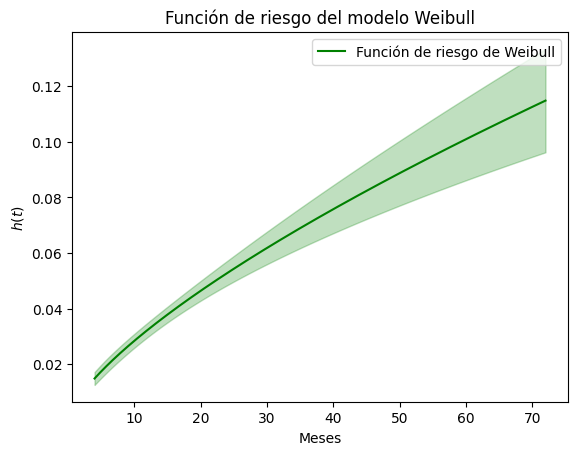

In [8]:
weib1.plot_hazard(label="Función de riesgo de Weibull", color="green")
plt.title('Función de riesgo del modelo Weibull')
plt.ylabel('$h(t)$')
plt.xlabel('Meses')
plt.show()

In [9]:
weib1.hazard_

,Weibull_estimate
4.000000,0.014869
4.136273,0.015225
4.272545,0.015578
4.408818,0.015928
4.545090,0.016275
...,...
71.454910,0.114210
71.591182,0.114364
71.727455,0.114518
71.863727,0.114672


In [10]:
from lifelines import LogNormalFitter

In [11]:
logn1 = LogNormalFitter().fit(cred_riesgo["duration"], cred_riesgo["full_repaid"])

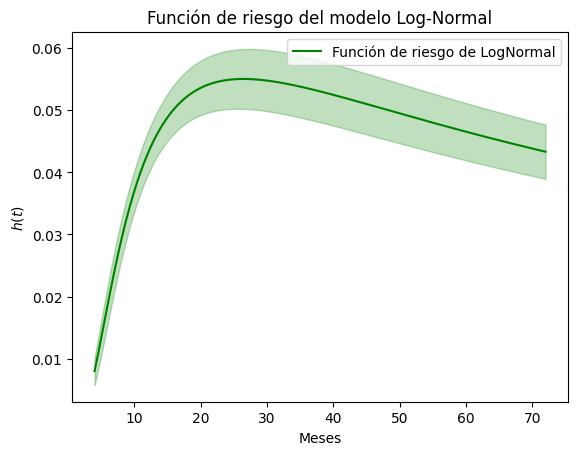

In [12]:
logn1.plot_hazard(label="Función de riesgo de LogNormal", color="green")
plt.title('Función de riesgo del modelo Log-Normal')
plt.ylabel('$h(t)$')
plt.xlabel('Meses')
plt.show()

In [13]:
logn1.hazard_

,LogNormal_estimate
4.000000,0.007982
4.136273,0.008671
4.272545,0.009375
4.408818,0.010091
4.545090,0.010819
...,...
71.454910,0.043464
71.591182,0.043430
71.727455,0.043395
71.863727,0.043361


c) comenta que significa la grafica de la función de riesgo de la weibull respecto a si los clientes tardan en pagar

**R = La gráfica de función de riesgo Weibull significa que entre más pasen los meses existe mayor probabilidad de que los clientes cumplan con el pago del prestamo/crédito**

d) comenta que significa la grafica de la función de riesgo de la log-normal respecto a si los clientes tardan en pagar

**R = La gráfica de función de riesgo de la log-normal también significa que entre más pasen los meses existe mayor probabilidad de que los clientes cumplan con el pago del prestamo/crédito, pero en esta existe un rango de meses de 20 a 30 donde se presenta una mayor probabilidad/cumplimiento de pago y despues empieza a decrecer poco a poco en los meses proximos.**

## 2. Estima la función de supervivencia por el método de Kaplan-Meier para el tiempo que tardan los clientes en pagar y muestra su gráfica correspondiente

In [14]:
from lifelines import KaplanMeierFitter

In [15]:
km_cred_riesgo = KaplanMeierFitter().fit(cred_riesgo['duration'], cred_riesgo['full_repaid'])

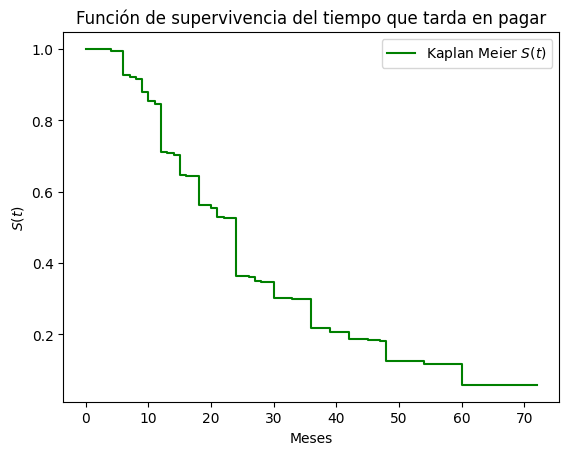

In [17]:
km_cred_riesgo.plot_survival_function(label='Kaplan Meier $S(t)$',ci_show = False,color='green');
plt.title('Función de supervivencia del tiempo que tarda en pagar')
plt.ylabel('$S(t)$')
plt.xlabel('Meses')
plt.show()

In [16]:
km_cred_riesgo.survival_function_

,KM_estimate
timeline,
0.0,1.000000
4.0,0.994000
5.0,0.993000
6.0,0.927000
7.0,0.921951
8.0,0.915892
9.0,0.880510
10.0,0.854824
11.0,0.845544


## 3. Coloca la gráfica de kaplan Meier sobre la grafica de supervivencia log-normal 

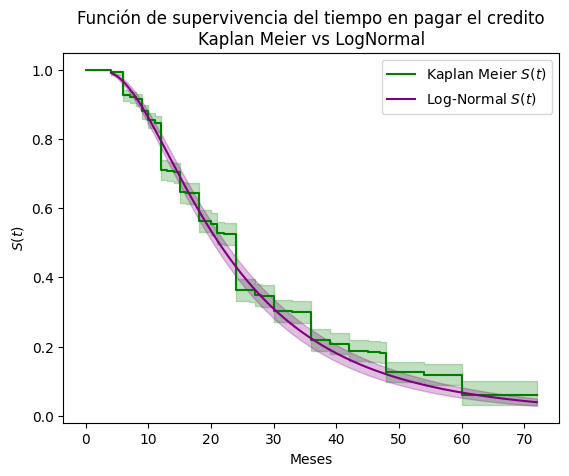

In [18]:
km_cred_riesgo.plot_survival_function(label='Kaplan Meier $S(t)$',ci_show = True,color='green');
logn1.plot_survival_function(label='Log-Normal $S(t)$',color='purple');
plt.title('Función de supervivencia del tiempo en pagar el credito\nKaplan Meier vs LogNormal')
plt.ylabel('$S(t)$')
plt.xlabel('Meses')
plt.show()

## 4. Comenta si las graficas se parecen o no, y en que se diferencian

**R: Las graficas siguen la misma naturaleza, compartiendo similitudes en su trayectoria, es decir que si se parecen.**

## 5. El banco considera que los que piden préstado una gran cantidad de dinero en realidad nunca piensa pagar

a) calcula la mediana de la cantidad que pidieron prestado (amount of money borrowed), asigna un 1 a quienes se encuentran igual o arriba de la mediana (deben mucho) y 0 a los que se encuentran debajo de la mediana (deben poco)

In [19]:
from statistics import median

In [20]:
mediana=median(cred_riesgo['amount'])

In [21]:
print('La mediana de mis datos es: ' + str(mediana))

La mediana de mis datos es: 2319.5


In [22]:
cred_riesgo['Median Situation']=np.where(cred_riesgo['amount']>=mediana,1,0)

In [23]:
cred_riesgo.head()

,checking_account_status,duration,credit_history,purpose,amount,savings_account_status,employment_years,installment_rate,personal_status,other_debtors,...,age,other_installment_plans,housing,number_of_credits,job,people_liable,telephone,foreign_worker,full_repaid,Median Situation
0,below_0,6,critical_account,radio_TV,1169,unknown,above_7,4,M_single,None,...,67,None,own,2,official,1,1,1,1,0
1,0_to_200,48,existing_credit_paid,radio_TV,5951,below_100,between_1_4,2,F_not_single,None,...,22,None,own,1,official,1,0,1,0,1
2,no_account,12,critical_account,education,2096,below_100,between_4_7,2,M_single,None,...,49,None,own,1,unskilled,2,0,1,1,0
3,below_0,42,existing_credit_paid,furniture_equipment,7882,below_100,between_4_7,2,M_single,guarantor,...,45,None,free,1,official,2,0,1,1,1
4,below_0,24,delay_in_paying,car_new,4870,below_100,between_1_4,3,M_single,None,...,53,None,free,2,official,2,0,1,0,1


b) Elabora y grafica juntas las funciones de supervivencia por el método de Kaplan-Meier para los que deben mucho y para los que deben poco.

In [24]:
debe_mucho = cred_riesgo[cred_riesgo['Median Situation']==1]
debe_poco = cred_riesgo[cred_riesgo['Median Situation']==0]

In [25]:
km_debe_mucho = KaplanMeierFitter().fit(debe_mucho['duration'], debe_mucho['full_repaid'])
km_debe_poco = KaplanMeierFitter().fit(debe_poco['duration'], debe_poco['full_repaid'])

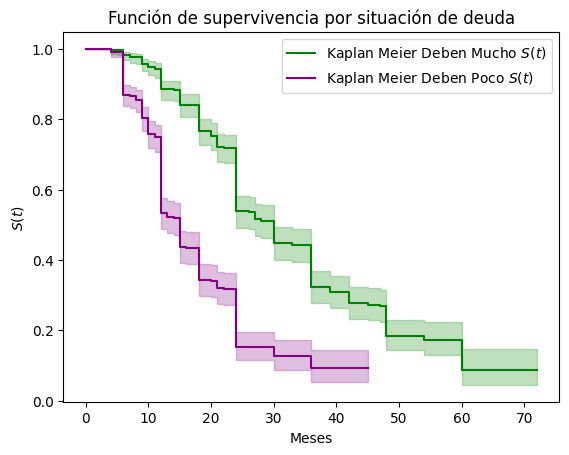

In [27]:
km_debe_mucho.plot_survival_function(label='Kaplan Meier Deben Mucho $S(t)$',ci_show = True,color='green');
km_debe_poco.plot_survival_function(label='Kaplan Meier Deben Poco $S(t)$',ci_show = True,color='purple');
plt.title('Función de supervivencia por situación de deuda')
plt.ylabel('$S(t)$')
plt.xlabel('Meses')
plt.show()

c) Interpreta las graficas de supervivencia, ¿qué significan? ¿quién paga más rápido? ¿quién tarda en pagar más?  

**R = La función de supervivencia significa la probabilidad del tiempo que se tardara hasta que se cumpla el evento, en este caso ambas graficas representan lo siguiente:**

**La grafica de color morado: Representa a los clientes que deben poco y cuentan con una función de supervivencia más corta es decir que son los que más rapido pagan su prestamo.**

**La grafica de color verde: Representa a los clientes que deben mucho y su funcion de supervivencia es más larga es decir que son los que tardan más en pagar su prestamo.**

d) Elabora un log-rank test para comprobar si las funciones de supervivencia de los que deben mucho y los que deben poco son distintas, e interpreta el resultado de la prueba

In [28]:
from lifelines.statistics import logrank_test

In [29]:
lrt=logrank_test( debe_mucho['duration'],debe_poco['duration']
                ,debe_mucho['full_repaid'],debe_poco['full_repaid'])

In [30]:
lrt.print_summary

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         199.26 <0.005    147.89>

In [31]:
lrt.summary

,test_statistic,p,-log2(p)
0,199.25958,3.029769e-45,147.887556


## HIPÓTESIS:

H0: las funciones de supervivencia de los que deben mucho y los que deben poco son IGUALES.

Ha: las funciones de supervivencia de los que deben mucho y los que deben poco son DISTINTAS.

Siguiendo el criterio del P.valor: **RECHAZAMOS H0** si **P.valor < $\alpha$**

**Conclusión:** con un 95% de confianza **RECHAZAMOS H0**, es decir que las las funciones de supervivencia de los que deben mucho y los que deben poco son **DISTINTAS**.


e) ¿el banco tenía razón? Explique

### El banco tiene razon ya que como comprobamos en el inciso d) las funciones de supervivencia son diferentes por ende podemos concluir que los clientes que piden más dinero al banco son lo que tardan más en liquidarlo/pagarlo.

## 6. Elige seis variables para ajustar un modelo de cox de riesgos porporcionales. Antes de correr el modelo explica en qué sentido y por qué afectan el riesgo de pagar el préstamo cada una de las variables elegidas


**Selección de variables**

**1° Age:** Si la persona es muy joven puede que no tenga tanta experiencia y por ende no sabe las consecuencias reales que conlleva el no cumplir con los pagos de un crédito y también los pocos ingresos que genera al principio de su carrera laboral.

**2° People_liable:** Representa los dependientes economicos del cliente, es decir a cuantos mantiene, esto es un factor importante ya que divide sus ingresos en más partes además del designado para el pago del prestamo.

**3° Employment_years:** Más años de antiguedad en un empleo representa ingresos constantes y menos años de antiguedad puede representar inseguridad en los ingresos del cliente ya sea porque no tiene la cualidad de responsabilidad/compromiso en durar en un trabajo y por ende afecta el pago del prestamo.

**4° Present_residence**: Representa la cantidad de años que tiene viviendo el cliente en un lugar y esto quiere decir que si tiene muy poco tiempo de residencia le generaría inseguridad al banco de que se mantenga viviendo ahi y por ende no sabria si terminará de liquidar el préstamo.

**5° Installment_rate:** Es la tasa que se cobra por la cantida prestada, si la tasa es muy grande puede que los intereses lo consuman y no acabe de pagar la deuda.

**6° Number_of_credits:** Muestra la cantidad de creditos que se le ha otorgado a la persona en el banco y si cuenta con varios significa que es un cliente con un cumplimiento alto al momento de pagar.



In [32]:
cred_riesgo_cox = cred_riesgo[['duration', 'full_repaid',"age", "people_liable", "employment_years", "present_residence", "installment_rate", "number_of_credits"]]
cred_riesgo_cox

,duration,full_repaid,age,people_liable,employment_years,present_residence,installment_rate,number_of_credits
0,6,1,67,1,above_7,4,4,2
1,48,0,22,1,between_1_4,2,2,1
2,12,1,49,2,between_4_7,3,2,1
3,42,1,45,2,between_4_7,4,2,1
4,24,0,53,2,between_1_4,4,3,2
...,...,...,...,...,...,...,...,...
995,12,1,31,1,between_4_7,4,3,1
996,30,1,40,1,between_1_4,4,4,1
997,12,1,38,1,above_7,4,4,1
998,45,0,23,1,between_1_4,4,4,1


In [33]:
#Transformamos en formato numerico la columna de años de empleado para poder ajustar el modelo
cred_riesgo_cox = cred_riesgo_cox.replace({'above_7':7, 'between_4_7':4,'between_1_4':1,'below_1':0.5,'unemployed':0}) 
cred_riesgo_cox

,duration,full_repaid,age,people_liable,employment_years,present_residence,installment_rate,number_of_credits
0,6,1,67,1,7.0,4,4,2
1,48,0,22,1,1.0,2,2,1
2,12,1,49,2,4.0,3,2,1
3,42,1,45,2,4.0,4,2,1
4,24,0,53,2,1.0,4,3,2
...,...,...,...,...,...,...,...,...
995,12,1,31,1,4.0,4,3,1
996,30,1,40,1,1.0,4,4,1
997,12,1,38,1,7.0,4,4,1
998,45,0,23,1,1.0,4,4,1


In [34]:
from lifelines import CoxPHFitter

In [35]:
cph= CoxPHFitter().fit(cred_riesgo_cox,'duration','full_repaid')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'duration'
                event col = 'full_repaid'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4259.65
         time fit was run = 2023-04-03 23:49:02 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
age                 0.01       1.01       0.00             0.00             0.02                 1.00                 1.02
people_liable       0.02       1.02       0.11            -0.19             0.22                 0.83                 1.25
employment_years    0.01       1.01       0.02            -0.02             0.04                 0.98                 1.04
present_residence  -0.05       0.95       0.04            -0.12             0.02                 0.89                 1.02
installment_rate   -0.11       0.89       0.03            -0.18            -0.05                 0.83                 0.96
number_of_credits   0.05       1.05       0.07            -0.08             0.18                 0.92                 1.20

                    cmp to     z      p   -log2(p)
covariate                                         
age                   0.00  2.74   0.01       7.34
people_liable         0.00  0.15   0.88       0.18
employment_years      0.00  0.47   0.64       0.65
present_residence     0.00 -1.36   0.17       2.53
installment_rate      0.00 -3.26 <0.005       9.80
number_of_credits     0.00  0.74   0.46       1.12
---
Concordance = 0.57
Partial AIC = 8531.31
log-likelihood ratio test = 19.46 on 6 df
-log2(p) of ll-ratio test = 8.18

## 7. Interpreta la regresión de Cox




**Prueba de significancia**

$ H0: B1=0 $  **Variables no muestran relacion**

$ Ha: B1\neq0 $ **Variables muestran relacion**

**Bajo el criterio del p-valor RECHAZO H0 si $ p-valor<\alpha $**

Donde $ \alpha = 0.05 $ es el nivel de significancia de la prueba.


El signo de Coef nos dice si la variable aumenta/disminuye el riesgo.

El exp(coef) te dice el efecto.

Si coef < 0 --> 1 - exp(coef).

Si coef > 0 --> exp(coef)-1

# RESPUESTAS 

**Variable age:** como 0.01 < 0.05, **RECHAZAMOS H0** es decir muestra relación con pagar el crédito.

Como el coef es mayor que 0 --> entonces 1.01 - 1 = 0.01

**Conclusión:** La edad aumenta el riesgo de realizar el pago del credito en promedio por cada año cumplido el riesgo de pagar la deuda aumenta en un 1%.

**Variable installment_rate** como 0.005 < 0.05 **RECHAZAMOS H0** es decir muestra relación con pagar el crédito.

Como el coef es menor que 0 ---> entonces 1 - 0.89 = 0.11

**Conclusión:** La tasa de interes disminuye el riesgo de realizar el pago del credito en promedio por cada aumento en la tasa, el riesgo de pagar la deuda disminuye en un 11%.


## 8. Con base en el análisis hecho hasta ahora qué recomendación podría hacer al banco para mejorar sus políticas de préstamo

**De acorde a los resultado vistos duarante el analisis mis recomendaciones son las siguientes:**

**1° Ajustar mejor los prestamos para los jovenes, ya que gracias a la regresión de Cox nos podemos dar cuenta que los jovenes no soy muy buenos cumpliendo con el pago del préstamo.**

**2° Ajustar las tasas de interés ya que como vimos en la regresión de Cox una tasa de interés muy alta disminuye el riesgo de realizar el pago del prestamo.**

**3° Tambien sugerir que moderen la cantidad de dinero prestado, ya que como vimos en todo el punto 5 el prestar mucho dinero hace que los clientes tarden más en liquidar su deuda.**